In [24]:
# Various interpretation of Netflix Data

# Importing the data
import pandas as pd

Netflix_Data = pd.read_csv(r"C:\Users\MOHANRAJ\Desktop\Projects\Netflix_Data_Insight\Netflix Dataset.csv")
Netflix_Data.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [26]:
# Finding and Removing the duplicated values

# Before the datasets shape
print(Netflix_Data.shape,"\n")

# Finding the Duplicated values
Dup_Netflix_Data = Netflix_Data[Netflix_Data.duplicated(keep = False)]
print(Dup_Netflix_Data.shape,"\n")

# Removing the Duplicated values
Netflix_Data.drop_duplicates(keep = False,inplace= True)
print(Netflix_Data.shape)

(7789, 11) 

(4, 11) 

(7785, 11)


In [28]:
# To know the Specific show or movies id and directors

# For example we want to know the id and directors of House of Cards
HC_NT = Netflix_Data[Netflix_Data["Title"] == "House of Cards"]
HC_NT[["Show_Id" , "Director"]]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


In [29]:
# Creating a new column as Date using to_datetime fuction to Release date column and droping it
Netflix_Data ["Date"] = pd.to_datetime(Netflix_Data["Release_Date"])
Netflix_Data.drop("Release_Date",axis=1,inplace=True)
Netflix_Data.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


2019.0    2152
2020.0    2008
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Date, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


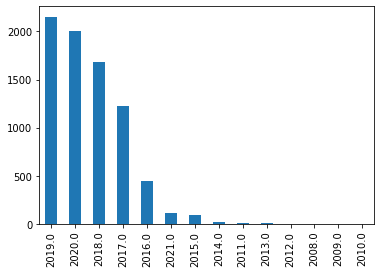

In [40]:
# In which year has the highest no of shows or movie released
HSM = Netflix_Data["Date"].dt.year.value_counts()
print(HSM,"\n")
print(HSM.plot(kind = "bar"))

Category
Movie      5375
TV Show    2410
Name: Category, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


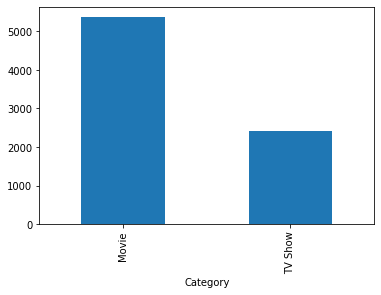

In [39]:
# TO find how many tv shows and movies in the dataset
Shows_Movies=Netflix_Data.groupby("Category").Category.count()
print(Shows_Movies,"\n")
print(Shows_Movies.plot(kind="bar"))

In [41]:
# To view all the tvshows released in year 2020

# Create new column as year
Netflix_Data["Year"] = Netflix_Data["Date"].dt.year
Show_2020 = Netflix_Data[(Netflix_Data["Year"] == 2020) & (Netflix_Data["Category"] == "TV Show")]
Show_2020.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2020-01-23,2020.0
26,s27,TV Show,(Un)Well,NaN,NaN,United States,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...,2020-08-12,2020.0
29,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...,2020-04-17,2020.0
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount...",2020-12-07,2020.0


In [44]:
# To view all the Movies released in India
Movie_India = Netflix_Data[(Netflix_Data["Category"] == "Movie") & (Netflix_Data["Country"]=="India")]
Movie_India[["Title" , "Country"]].head()

,Title,Country
8,706,India
9,1920,India
18,15-Aug,India
20,​​Kuch Bheege Alfaaz,India
21,​Goli Soda 2,India


Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Kunle Afolayan             8
Name: Director, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


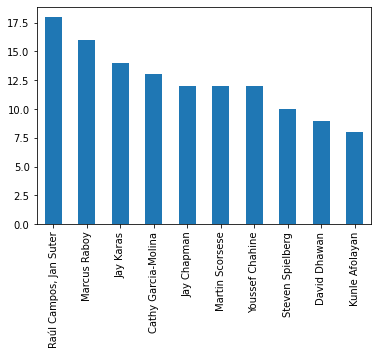

In [47]:
# To view top 10 director who gave highest no of tv show and movie
Directors_Released = Netflix_Data["Director"].value_counts()
print(Directors_Released.head(10),"\n")
print(Directors_Released.head(10).plot(kind="bar"))

In [48]:
# To view specific record
Netflix_Data[(Netflix_Data["Category"]=="Movie")&(Netflix_Data["Type"]=="Comedies")|(Netflix_Data["Country"]=="United States")].head(5)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date,Year
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017-10-20,2017.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0


In [62]:
df1 = Netflix_Data[(Netflix_Data["Category"]=="TV Show")&(Netflix_Data["Type"]=="Kids' TV")]
df1.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date,Year
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017-06-16,2017.0
3582,s3583,TV Show,Lego Friends: Girls on a Mission,"Andrew Tan, Stephen Murray","Jasmine St. Clair, Allegra Clark, Rosamund Mar...",Denmark,TV-Y,1 Season,Kids' TV,"Five best friends put their teamwork, wits and...",2019-02-01,2019.0
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,2020.0
6204,s6204,TV Show,The Cat in the Hat Knows a Lot About That!,Tony Collingwood,"Martin Short, Alexa Torrington, Jacob Ewaniuk,...","Canada, United Kingdom, United States",TV-Y,1 Season,Kids' TV,"The Cat in the Hat is back – and this time, he...",2021-01-01,2021.0


In [64]:
df2 = Netflix_Data[(Netflix_Data["Type"]=="Dramas")&(Netflix_Data["Category"]=="Movie")]
df2.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date,Year
6847,s6846,Movie,The Ryan White Story,John Herzfeld,"Judith Light, Lukas Haas, Michael Bowen, Nikki...",United States,TV-PG,94 min,Dramas,After contracting HIV from a tainted blood tre...,2011-10-01,2011.0
7364,s7363,Movie,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,TV-14,95 min,Dramas,Laurie and Joseph are doctors who interview se...,2011-10-01,2011.0
2622,s2623,Movie,Hard Lessons,Eric Laneuville,"Denzel Washington, Lynn Whitfield, Richard Mas...",United States,TV-14,94 min,Dramas,This drama based on real-life events tells the...,2011-10-01,2011.0
5833,s5833,Movie,Strange Voices,Arthur Allan Seidelman,"Nancy McKeon, Valerie Harper, Stephen Macht, T...",United States,TV-PG,96 min,Dramas,When their college-age daughter suddenly begin...,2011-10-01,2011.0
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011.0


In [52]:
# To view how any movies is Nasty C is cast
Netflix_Data[Netflix_Data["Cast"] == "Nasty C"]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date,Year
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,2020.0


David Attenborough                                                                                                        18
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Kevin Hart                                                                                                                 6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Craig Sechler                                                                                                              6
Iliza Shlesinger                                                                                                           5
Bill Burr                                                                                                                  5


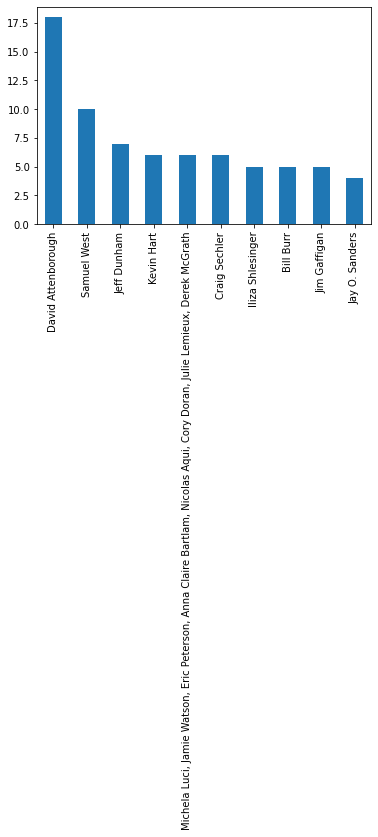

In [53]:
# To view no of cast was done no of movie or tv show
Casts_Projects = Netflix_Data["Cast"].value_counts()
print(Casts_Projects.head(10),"\n")
print(Casts_Projects.head(10).plot(kind="bar"))

In [56]:
# To view TV-MA rated Tv Show after 2018

# Dropping na 
Netflix_Data.dropna(axis = 0 , inplace = True)

R_TvShow = Netflix_Data[(Netflix_Data["Category"] == "TV Show") & (Netflix_Data["Year"] > 2018) & (Netflix_Data["Rating"] == "TV-MA")]
R_TvShow.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date,Year
426,s427,TV Show,Almost Happy,Hernán Guerschuny,"Sebastián Wainraich, Natalie Pérez, Santiago K...",Argentina,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","Sebastián is a radio show host of modest fame,...",2020-05-02,2020.0
531,s532,TV Show,Anitta: Made In Honório,"Andrucha Waddington, Pedro Waddington",Anitta,Brazil,TV-MA,1 Season,"Docuseries, International TV Shows","In this intimate documentary, Brazilian pop qu...",2020-12-16,2020.0
805,s806,TV Show,Before 30,BB Sasore,"Damilola Adegbite, O.C. Ukeje, Beverly Naya, M...",Nigeria,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Four female friends in the fast-paced city of ...,2020-11-24,2020.0
941,s942,TV Show,Bitter Daisies,Miguel Conde,"María Mera, Toni Salgado, Miquel Insua, Denis ...",Spain,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",While investigating the disappearance of a tee...,2019-03-29,2019.0
958,s959,TV Show,Black Money Love,Ahmet Katıksız,"Güler Ökten, Hazal Türesan, İlkin Tüfekçi, Bed...",Turkey,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a cop's fiancée and a jewelry designer's...,2019-10-15,2019.0


United States     27
United Kingdom    19
Japan             10
South Korea       10
Spain              7
Taiwan             6
Turkey             5
India              5
Brazil             4
Canada             3
Name: Country, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


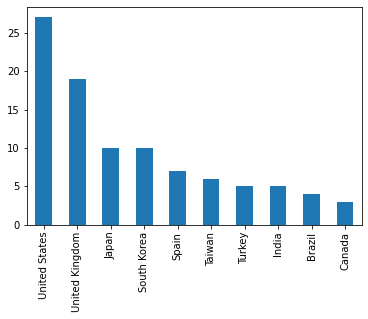

In [58]:
# To view highest no of tv shows in each country
TvShows_Country = Netflix_Data[Netflix_Data["Category"] == "TV Show"]["Country"].value_counts()
print(TvShows_Country.head(10),"\n")
print(TvShows_Country.head(10).plot(kind="bar"))

In [60]:
# Sorting the Dataset by year
Netflix_Data = Netflix_Data.sort_values(by=["Year"],ascending = True)
Netflix_Data.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009.0
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009.0
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010.0
6847,s6846,Movie,The Ryan White Story,John Herzfeld,"Judith Light, Lukas Haas, Michael Bowen, Nikki...",United States,TV-PG,94 min,Dramas,After contracting HIV from a tainted blood tre...,2011-10-01,2011.0
